The three gastruloids came from wells E8, F8 and B10 of a gastruloid 96-wells plate, hence the naming. They were sectioned using 20um sections, they were quite long so I expect ~50 sections per gastruloid, and they were all sectioned into a separate 96-well tomo-seq plate to reduce batch-effects

Percentage
Index
AVO342 (VAN3422)
SvdB-Lfng2-Tomo-E8-10-20um-FullGastruloid-Run1
16.3333333
42
SvdB-Lfng2-Tomo-F8-11-20um-FullGastruloid-Run1
16.3333333
43
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1
16.3333333
44
AVO343 (VAN3423)
SvdB-Lfng2-Tomo-E8-10-20um-FullGastruloid-Run2
11.3333333
42
SvdB-Lfng2-Tomo-F8-11-20um-FullGastruloid-Run2
11.3333333
43
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run2
11.3333333
44

In [1]:
ls ../rawdata/

SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1.log
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_starLog.final.out
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_starLog.out
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_starLog.progress.out
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_starSJ.out.tab
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_star_spliced.coutb.tsv.gz
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_star_spliced.coutc.tsv.gz
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_star_spliced.coutt.tsv.gz
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_star_total.coutb.tsv.gz
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_star_total.coutc.tsv.gz
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_star_total.coutt.tsv.gz
SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_star_unspliced.coutb.tsv.gz


# Important functions

In [2]:
def getPlotTotalReads(df):
    ercc = [idx for idx in df.index if 'ERCC' in idx]
    mt = [idx for idx in df.index if '_chrM' in idx]
    if len(mt) == 0:
        mt = [idx for idx in df.index if '_MT' in idx]
    genes = [idx for idx in df.index if idx not in ercc and idx not in mt]
    plt.bar(range(len(df.columns)), df.loc[genes].sum()+1, log = 'y')
    plt.bar(range(len(df.columns)), df.loc[mt].sum()+1, log = 'y')
    plt.bar(range(len(df.columns)), df.loc[ercc].sum()+1, log = 'y')
    plt.xticks(range(len(df.columns))[::5], df.columns[::5], rotation = 90)
    plt.ylabel('total')
    plt.xlabel('well')
    plt.legend(['genes', 'mt', 'ercc'])
    return plt

In [3]:
def getCBT(dfs, output = ''):
    dfc, dfb, dft = dfs
    fig = plt.figure(figsize=(15,3))
    plt.subplot(131)
    plt1 = getPlotTotalReads(dfc)
    plt1.title('counts')
    plt.subplot(132)
    plt2 = getPlotTotalReads(dfb)
    plt2.title('barcodes')
    plt.subplot(133)
    plt3 = getPlotTotalReads(dft)
    plt3.title('transcripts')
    if output != '':
        plt.savefig(output, bbox_inches = 'tight')
    return plt.show()

In [4]:
def plotGeneT(df):
    gene = [idx for idx in df.index if 'T_' in idx]
    plt.bar(range(len(df.columns)), df.loc[gene].sum())
    return plt.show()

In [5]:
def renameColumns(df, label):
    m = len(str(len(df.columns)))
    df.columns = ['-'.join([str(i+1).zfill(m),label]) for i in range(len(df.columns))]
    return df

In [6]:
def readData(filename):
    dfc = read_csv(filename + '.coutc.tsv.gz', sep = '\t', index_col=0)
    dfb = read_csv(filename + '.coutb.tsv.gz', sep = '\t', index_col=0)
    dft = read_csv(filename + '.coutt.tsv.gz', sep = '\t', index_col=0)
    dfc.columns = [c.zfill(3) for c in dfc.columns]; 
    dfb.columns = [c.zfill(3) for c in dfb.columns]; 
    dft.columns = [c.zfill(3) for c in dft.columns]; 
    dfc = dfc[sorted(dfc.columns)]; 
    dfb = dfb[sorted(dfb.columns)]
    dft = dft[sorted(dft.columns)]
    dfc = dfc.loc[dfb.index]
    dfc = dfc.fillna(0)
    dfc = dfc*(dfb>0) 
    dfc = dfc[dfc.columns[:97]]
    dfb = dfb[dfb.columns[:97]]
    dft = dft[dft.columns[:97]]
    return dfc, dfb, dft

In [7]:
def mergeGstrls(dfs1, col1, lab1, dfs2, col2, lab2):
    dfc1, dfb1, dft1 = dfs1    
    dfca = dfc1[col1]; dfca.columns = ['-'.join([str(c),str(lab1)]) for c in dfca.columns]
    dfba = dfb1[col1]; dfba.columns = ['-'.join([str(c),str(lab1)]) for c in dfba.columns]
    dfta = dft1[col1]; dfta.columns = ['-'.join([str(c),str(lab1)]) for c in dfta.columns]
    
    dfc2, dfb2, dft2 = dfs2
    dfcb = dfc2[col2]; dfcb.columns = ['-'.join([str(c),str(lab2)]) for c in dfcb.columns]
    dfbb = dfb2[col2]; dfbb.columns = ['-'.join([str(c),str(lab2)]) for c in dfbb.columns]
    dftb = dft2[col2]; dftb.columns = ['-'.join([str(c),str(lab2)]) for c in dftb.columns]

    dfc = dfca.merge(dfcb, how = 'outer', left_index = True, right_index = True)
    dfb = dfba.merge(dfbb, how = 'outer', left_index = True, right_index = True)
    dft = dfta.merge(dftb, how = 'outer', left_index = True, right_index = True)
    
    dfc = dfc.fillna(0)
    dfb = dfb.fillna(0)
    dft = dft.fillna(0)
    return dfc, dfb, dft

In [8]:
def splitGst(dfs, col):
    return [df[col] for df in dfs]

In [9]:
def renameGst(dfs, label, name):
    dfc, dfb, dft = dfs
    cols = dfc.columns
    if label == 'PA':
        cols = dfc.columns[::-1]
    dfc = renameColumns(dfc[cols], name)
    dfb = renameColumns(dfb[cols], name)
    dft = renameColumns(dft[cols], name)
    return dfc, dfb, dft

In [10]:
def savedfs(dfs, name):
    dfc, dfb, dft = dfs
    dfc.to_csv(name + '.coutc.tsv', sep = '\t')
    dfb.to_csv(name + '.coutb.tsv', sep = '\t')
    dft.to_csv(name + '.coutt.tsv', sep = '\t')
    return

In [11]:
def removeGenes(df):
    genes = ['ERCC','chrM', 'Kcnq1ot1', 'Mir5109', 'Lars2','Malat1', 'Rn45s', 'Rpl', 'Rps','__MT']
    exclude = [idx for idx in df.index for g in genes if g in idx]
    return df.loc[[idx for idx in df.index if idx not in exclude]]

def removeGmGenes(df):
    g = []
    for idx in df.index:
        if 'Gm' in idx:
            gid = idx.rsplit('Gm')[1].rsplit('__')[0]
            if sum([n in [str(r) for r in range(10)] for n in gid]) == len(gid):
                g.append(idx)
    return df.loc[[idx for idx in df.index if idx not in g]]

# Rawdata for mG1, mG2, mG3
All contained in the same run (original OUD2255, OUD2280 for deeper sequencing). mG1 is in one block, mG2 and mG3 where together in another block. 

In [12]:
f1 = '../rawdata/SvdB-Lfng2-Tomo-E8-10-20um-FullGastruloid-Run1Run2_cbc_trimmed_star_spliced'
f2 = '../rawdata/SvdB-Lfng2-Tomo-F8-11-20um-FullGastruloid-Run1Run2_cbc_trimmed_star_spliced'
f3 = '../rawdata/SvdB-Lfng2-Tomo-B10-12-20um-FullGastruloid-Run1Run2_cbc_trimmed_star_spliced'
df1 = readData(f1)
df2 = readData(f2)
df3 = readData(f3)

/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


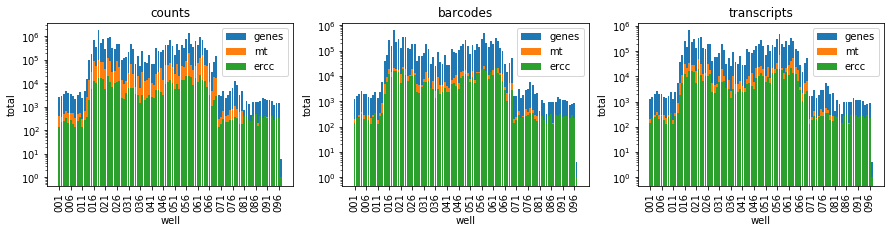

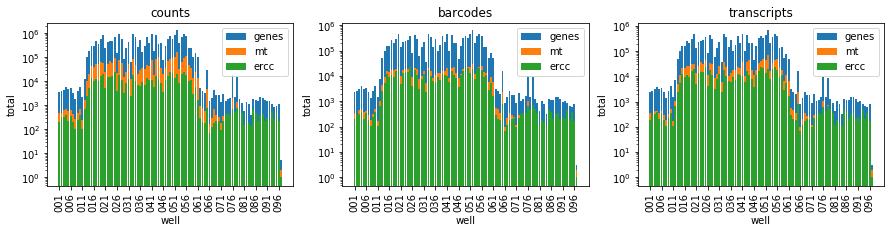

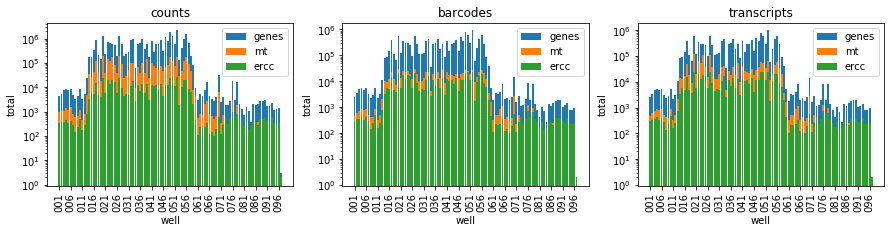

In [13]:
getCBT(df1, output = '../results/lfngMouseGastruloids/mG01_E08_coutcbt.pdf')
getCBT(df2, output = '../results/lfngMouseGastruloids/mG02_F08_coutcbt.pdf')
getCBT(df3, output = '../results/lfngMouseGastruloids/mG03_B10_coutcbt.pdf')

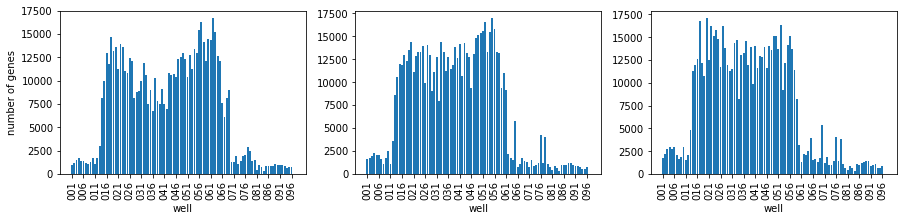

In [14]:
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.bar(range(len(df1[0].columns)), (df1[0]>0).sum())
plt.ylabel('number of genes')
plt.xlabel('well')

plt.xticks(range(len(df1[0].columns))[::5], df1[0].columns[::5], rotation = 90)
plt.subplot(132)
plt.bar(range(len(df2[0].columns)), (df2[0]>0).sum())
plt.xticks(range(len(df2[0].columns))[::5], df2[0].columns[::5], rotation = 90)
plt.xlabel('well')

plt.subplot(133)
plt.bar(range(len(df3[0].columns)), (df3[0]>0).sum())
plt.xticks(range(len(df3[0].columns))[::5], df3[0].columns[::5], rotation = 90)
plt.xlabel('well')
#plt.savefig('../results/lfngMouseGastruloids/mG010203_genes.pdf', bbox_inches = 'tight')
plt.show()

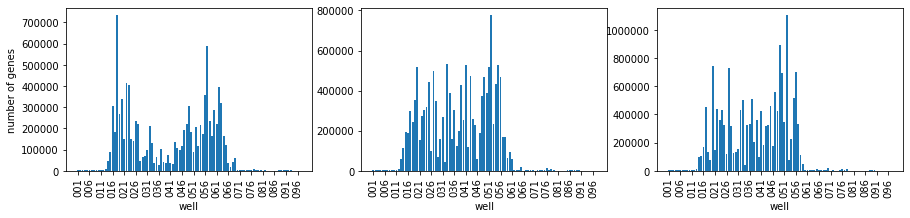

In [21]:
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.bar(range(len(df1[0].columns)), (df1[2]).sum())
plt.ylabel('number of genes')
plt.xlabel('well')

plt.xticks(range(len(df1[0].columns))[::5], df1[0].columns[::5], rotation = 90)
plt.subplot(132)
plt.bar(range(len(df2[0].columns)), (df2[2]).sum())
plt.xticks(range(len(df2[0].columns))[::5], df2[0].columns[::5], rotation = 90)
plt.xlabel('well')

plt.subplot(133)
plt.bar(range(len(df3[0].columns)), (df3[2]).sum())
plt.xticks(range(len(df3[0].columns))[::5], df3[0].columns[::5], rotation = 90)
plt.xlabel('well')
#plt.savefig('../results/lfngMouseGastruloids/mG010203_trans.pdf', bbox_inches = 'tight')
plt.show()

In [22]:
writer = pd.ExcelWriter('/Users/anna/Dropbox/gastruloids/WritingPapers/4thSubmission_Nature/source_data/edf3b.xlsx', engine='xlsxwriter')

names = ['g1_Lfng-20um_trans','g2_Lfng-20um_trans','g3_Lfng-20um_trans']
for i, df in enumerate([df1, df2, df3]):
    ((df[2]).sum()).to_excel(writer, sheet_name = names[i])
names = ['g1_Lfng-20um_genes','g2_Lfng-20um_genes','g3_Lfng-20um_genes']
for i, df in enumerate([df1, df2, df3]):
    ((df[0]>0).sum()).to_excel(writer, sheet_name = names[i])
writer.close()


In [20]:
df1[0].shape, df1[1].shape, df1[2].shape

((37581, 97), (37581, 97), (37581, 97))

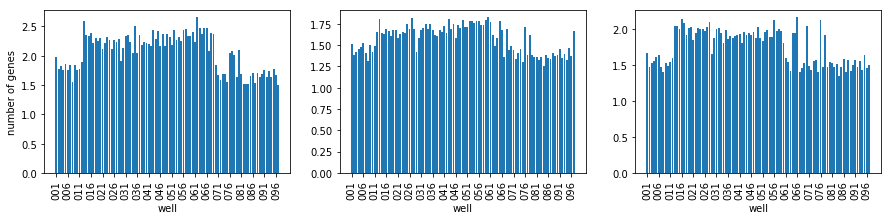

In [16]:
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.bar(range(len(df1[0].columns)), (df1[0]/df1[1]).mean())
plt.ylabel('number of genes')
plt.xlabel('well')
plt.xticks(range(len(df1[0].columns))[::5], df1[0].columns[::5], rotation = 90)

plt.subplot(132)
plt.bar(range(len(df2[0].columns)), (df2[0]/df2[1]).mean())
plt.xticks(range(len(df2[0].columns))[::5], df2[0].columns[::5], rotation = 90)
plt.xlabel('well')

plt.subplot(133)
plt.bar(range(len(df3[0].columns)), (df3[0]/df3[1]).mean())
plt.xticks(range(len(df3[0].columns))[::5], df3[0].columns[::5], rotation = 90)
plt.xlabel('well')
plt.savefig('../results/lfngMouseGastruloids/mG010203_overseq.pdf', bbox_inches = 'tight')
plt.show()

In [17]:
print(df1[2].columns[(df1[2].sum()>2e4)&((df1[2]>0).sum()>6000)])
print(df2[2].columns[(df2[2].sum()>2e4)&((df2[2]>0).sum()>6000)])
print(df3[2].columns[(df3[2].sum()>2e4)&((df3[2]>0).sum()>6000)])

Index([u'014', u'015', u'016', u'017', u'018', u'019', u'020', u'021', u'022',
       u'023', u'024', u'025', u'026', u'027', u'028', u'029', u'030', u'031',
       u'032', u'033', u'034', u'035', u'036', u'037', u'038', u'039', u'040',
       u'041', u'042', u'043', u'044', u'045', u'046', u'047', u'048', u'049',
       u'050', u'051', u'052', u'053', u'054', u'055', u'056', u'057', u'058',
       u'059', u'060', u'061', u'062', u'063', u'064', u'065', u'066', u'068',
       u'069'],
      dtype='object')
Index([u'013', u'014', u'015', u'016', u'017', u'018', u'019', u'020', u'021',
       u'022', u'023', u'024', u'025', u'026', u'027', u'028', u'029', u'030',
       u'031', u'032', u'033', u'034', u'035', u'036', u'037', u'038', u'039',
       u'040', u'041', u'042', u'043', u'044', u'045', u'046', u'047', u'048',
       u'049', u'050', u'051', u'052', u'053', u'054', u'055', u'056', u'057',
       u'058', u'059', u'060', u'061'],
      dtype='object')
Index([u'014', u'015', u'016', 

In [18]:
col_mg01 = [c for c in df1[2].columns[(df1[2].sum()>2e4)&((df1[2]>0).sum()>6000)] if c not in ['028','030','067']]
col_mg02 = [c for c in df2[2].columns[(df2[2].sum()>2e4)&((df2[2]>0).sum()>6000)] if c not in ['028','030','067']]
col_mg03 = [c for c in df3[2].columns[(df3[2].sum()>2e4)&((df3[2]>0).sum()>6000)] if c not in ['028','030','067']]

In [19]:
[len(cols) for cols in [col_mg01, col_mg02, col_mg03]]

[53, 47, 44]

In [20]:
df_g1 = splitGst(df1, col_mg01)
df_g2 = splitGst(df2, col_mg02)
df_g3 = splitGst(df3, col_mg03)

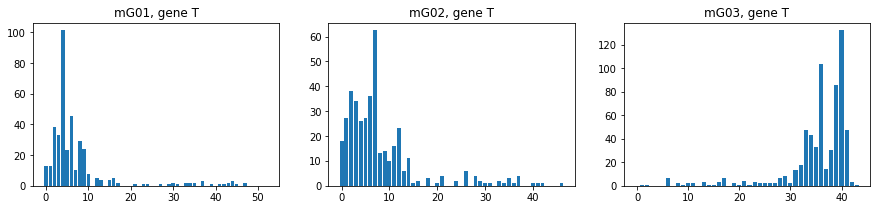

In [21]:
g = [idx for idx in df_g1[-1].index if 'T_' in idx][0]
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.bar(range(len(df_g1[-1].columns)), df_g1[-1].loc[g]); plt.title('mG01, gene T')
plt.subplot(132)
plt.bar(range(len(df_g2[-1].columns)), df_g2[-1].loc[g]); plt.title('mG02, gene T')
plt.subplot(133)
plt.bar(range(len(df_g3[-1].columns)), df_g3[-1].loc[g]); plt.title('mG03, gene T')
plt.savefig('../results/lfngMouseGastruloids/mG010203_geneT.pdf', bbox_inches = 'tight')
plt.show()

In [22]:
df_g1 = renameGst(df_g1, 'PA', 'mG01')
df_g2 = renameGst(df_g2, 'PA', 'mG02')
df_g3 = renameGst(df_g3, 'AP', 'mG03')

# output files

In [23]:
savedfs(df_g1, '../mG01_E08_5dAA_lngf')
savedfs(df_g2, '../mG02_F08_5dAA_lngf')
savedfs(df_g3, '../mG03_B10_5dAA_lngf')